In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data=pd.read_csv("C:/Users/User/Downloads/Problem 2.csv")

In [4]:
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4
...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0


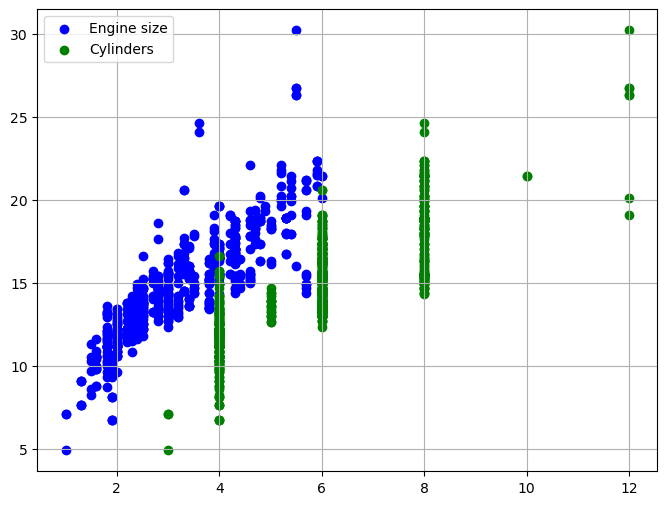

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 45.1+ KB


In [5]:
#Plotting raw data
engine=np.array([data["ENGINE SIZE"]])
cylinders=np.array([data["CYLINDERS"]])
f_c=np.array([data["FUEL CONSUMPTION"]])
plt.figure(figsize=(8,6))
plt.scatter(engine,f_c,color="blue",label="Engine size")
plt.scatter(cylinders,f_c,color="green",label="Cylinders")
plt.grid()
plt.legend()
plt.show()
data.info()

In [6]:

def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
   
            
                dummies = pd.get_dummies(df[column], prefix=prefix)
                df = pd.concat([df, dummies], axis=1)
                df = df.drop(column, axis=1)
           
    return df

In [7]:
def preprocess_inputs(df):
    df=df.copy()
    nominal_feature_dict={
        #"Year":"YEA",
        "MODEL":"MOD",
        "VEHICLE CLASS":"VEH",
        "TRANSMISSION":"TRANS",
        "FUEL":"FUE",
       # 'CYLINDERS':'CYL',
        'MAKE':'MK'
        
    }
    df=onehot_encode(df,nominal_feature_dict)
    
    
    
    y=df['FUEL CONSUMPTION'].copy()
    X=df.drop('FUEL CONSUMPTION',axis=1).copy()
    
    X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,random_state=123)
   
    scaler=StandardScaler()
    scaler.fit(X_train)
    
    X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    return X_train,X_test,y_train,y_test


In [8]:

X_train,X_test,y_train,y_test=preprocess_inputs(data)


In [9]:
X_train


,Year,ENGINE SIZE,CYLINDERS,MOD_1.6EL,MOD_3.2TL,MOD_3.5RL,MOD_300M,MOD_323 CONVERTIBLE,MOD_323Ci,MOD_323i,...,MK_PLYMOUTH,MK_PONTIAC,MK_PORSCHE,MK_SAAB,MK_SATURN,MK_SUBARU,MK_SUZUKI,MK_TOYOTA,MK_VOLKSWAGEN,MK_VOLVO
0,0.0,0.297758,1.349256,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
1,0.0,-0.752803,-0.460096,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,5.029326
2,0.0,0.863445,0.143021,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
3,0.0,-0.995240,-1.063214,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
4,0.0,0.863445,0.143021,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.0,1.429132,1.349256,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
443,0.0,-1.318490,-1.063214,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
444,0.0,-0.187116,0.143021,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834
445,0.0,0.621008,0.143021,-0.047351,-0.047351,-0.047351,0.0,-0.047351,0.0,0.0,...,-0.047351,-0.173072,-0.116642,-0.116642,-0.158838,-0.134993,-0.134993,-0.277684,-0.253546,-0.198834


In [10]:
{column:len(X_train[column].unique()) for column  in X_train.columns}

{'Year': 1,
 'ENGINE SIZE': 40,
 'CYLINDERS': 7,
 'MOD_1.6EL': 2,
 'MOD_3.2TL': 2,
 'MOD_3.5RL': 2,
 'MOD_300M': 1,
 'MOD_323 CONVERTIBLE': 2,
 'MOD_323Ci': 1,
 'MOD_323i': 1,
 'MOD_328Ci': 2,
 'MOD_328i': 2,
 'MOD_360 MODENA F1': 2,
 'MOD_456 MGT': 2,
 'MOD_456 MGTA': 2,
 'MOD_4RUNNER 4X4': 2,
 'MOD_528i': 2,
 'MOD_528i TOURING': 2,
 'MOD_540i': 2,
 'MOD_540i TOURING': 2,
 'MOD_550 MARANELLO': 2,
 'MOD_626': 2,
 'MOD_740i': 1,
 'MOD_740iL': 2,
 'MOD_750iL': 2,
 'MOD_9-3 TURBO': 2,
 'MOD_9-5 TURBO': 2,
 'MOD_9-5 WAGON TURBO': 2,
 'MOD_911 CARRERA': 1,
 'MOD_911 CARRERA 4': 2,
 'MOD_A4': 2,
 'MOD_A4 QUATTRO': 2,
 'MOD_A6': 2,
 'MOD_A6 AVANT QUATTRO': 2,
 'MOD_A6 QUATTRO': 2,
 'MOD_A8 QUATTRO': 1,
 'MOD_ACCENT': 2,
 'MOD_ACCORD': 2,
 'MOD_ACCORD DX': 2,
 'MOD_ACCORD EX/LX': 2,
 'MOD_ALERO': 2,
 'MOD_ALTIMA': 1,
 'MOD_ASTRO AWD CARGO': 2,
 'MOD_ASTRO AWD PASSENGER': 1,
 'MOD_ASTRO CARGO': 2,
 'MOD_ASTRO PASSENGER': 1,
 'MOD_AVALON': 1,
 'MOD_B3000': 2,
 'MOD_B4000': 2,
 'MOD_B4000 4X4': 2

In [11]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

linear_r2=linear_model.score(X_test,y_test)
print("Linear Regression r^2: {:.5f}".format(linear_r2))

predicted_fuel_consumption = linear_model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicted_fuel_consumption
})


print(results.head())



Linear Regression r^2: -1480132358862149823546523648.00000
     Actual     Predicted
57     13.9  1.359663e+01
466    14.9  1.659077e+01
192    20.2  1.964351e+01
310    13.8  1.308882e+01
273    14.0  3.074066e+14


In [12]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

tree_r2=tree_model.score(X_test,y_test)
print("Decision Tree r^2: {:.5f}".format(tree_r2))

predicted_fuel_consumption = tree_model.predict(X_test)


results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicted_fuel_consumption
})


print(results.head())



Decision Tree r^2: 0.90533
     Actual  Predicted
57     13.9       14.6
466    14.9       14.4
192    20.2       20.0
310    13.8       11.6
273    14.0       13.5


In [13]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

rf_r2=rf_model.score(X_test,y_test)
print("Random Forest r^2: {:.5f}".format(rf_r2))

predicted_fuel_consumption = rf_model.predict(X_test)


results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicted_fuel_consumption
})


print(results.head())




Random Forest r^2: 0.91835
     Actual  Predicted
57     13.9     14.290
466    14.9     15.518
192    20.2     20.254
310    13.8     12.328
273    14.0     13.779


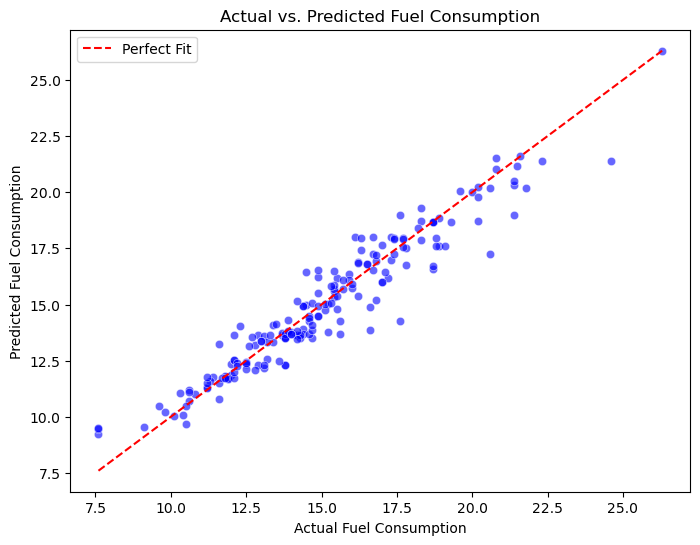

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure both arrays are 1D and have the same length
min_length = min(len(y_test), len(predicted_fuel_consumption))
y_test_trimmed = y_test[:min_length]
predicted_fuel_consumption_trimmed = predicted_fuel_consumption[:min_length]

plt.figure(figsize=(8, 6))

# Scatter plot: Actual vs. Predicted
sns.scatterplot(x=y_test_trimmed, y=predicted_fuel_consumption_trimmed, color='blue', alpha=0.6)

# Identity line (Perfect predictions reference)
plt.plot([min(y_test_trimmed), max(y_test_trimmed)], [min(y_test_trimmed), max(y_test_trimmed)], 
         linestyle='dashed', color='red', label="Perfect Fit")

# Labels and Title
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Actual vs. Predicted Fuel Consumption')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Display the metrics
print("Random Forest Model Metrics:")
print("Mean Squared Error (MSE): {:.5f}".format(mse))
print("Mean Absolute Error (MAE): {:.5f}".format(mae))


<AxesSubplot:xlabel='FUEL CONSUMPTION', ylabel='FUEL CONSUMPTION'>

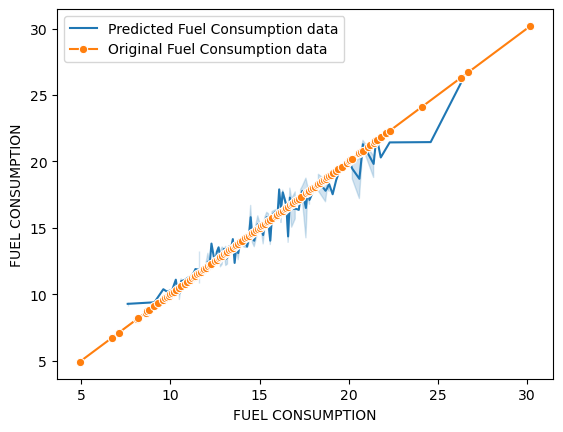

In [35]:
sns.lineplot(x=y_test, y=predicted_fuel_consumption, label='Predicted Fuel Consumption data')
sns.lineplot(data=data, x='FUEL CONSUMPTION', y=y_train, label='Original Fuel Consumption data', marker="o")
